# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from joblib import dump, load 
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv('../personality_raw.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Data Inspection

In [71]:
df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Stage_fear                 2827 non-null   object
 1   Drained_after_socializing  2848 non-null   object
 2   Personality                2900 non-null   object
dtypes: object(3)
memory usage: 68.1+ KB


In [72]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


## Missing Values

In [73]:
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'fitur': missing_count.index,
    'count': missing_count.values,
    '(%)': missing_percentage.values
})

missing_info = missing_info.sort_values(by='count', ascending=False).reset_index(drop=True)
missing_info

,fitur,count,(%)
0,Friends_circle_size,77,2.655172
1,Stage_fear,73,2.517241
2,Going_outside,66,2.275862
3,Post_frequency,65,2.241379
4,Time_spent_Alone,63,2.172414
5,Social_event_attendance,62,2.137931
6,Drained_after_socializing,52,1.793103
7,Personality,0,0.000000


## Univariate

### Categorical Features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\632609273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


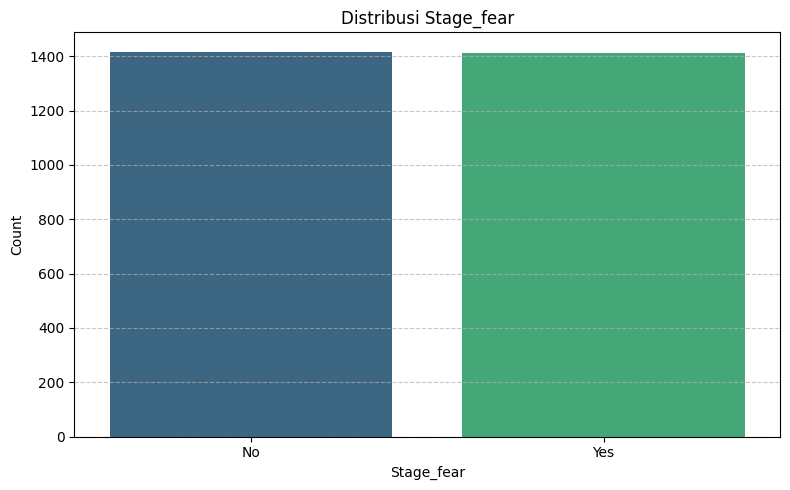


Frekuensi dan Persentase untuk Kolom 'Stage_fear':
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
Stage_fear
No     48.862069
Yes    48.620690
Name: count, dtype: float64
------------------------------


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\632609273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


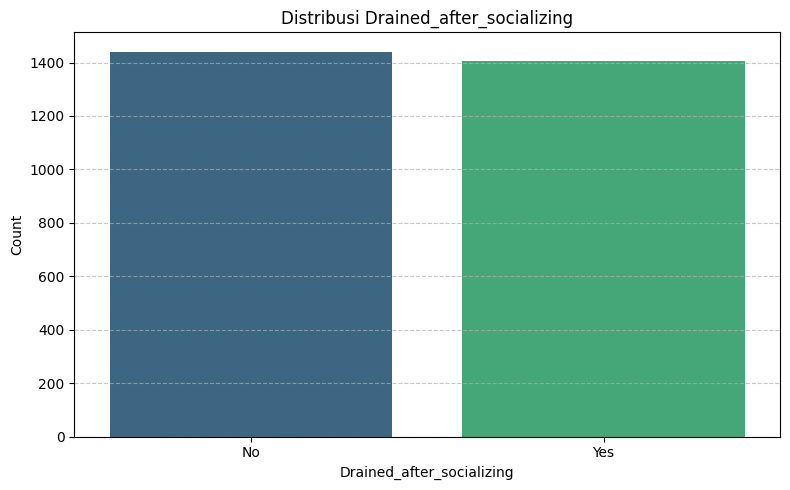


Frekuensi dan Persentase untuk Kolom 'Drained_after_socializing':
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
Drained_after_socializing
No     49.689655
Yes    48.517241
Name: count, dtype: float64
------------------------------


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\632609273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


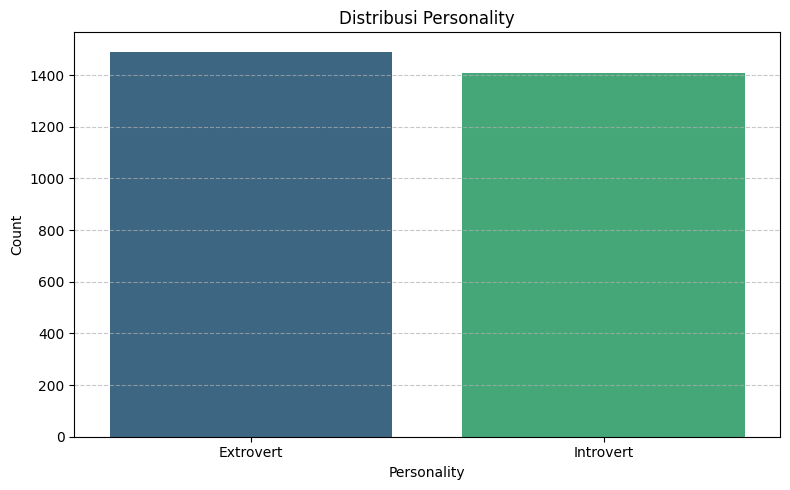


Frekuensi dan Persentase untuk Kolom 'Personality':
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Personality
Extrovert    51.413793
Introvert    48.586207
Name: count, dtype: float64
------------------------------
--------------------------------------------------


In [74]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\nFrekuensi dan Persentase untuk Kolom '{col}':")
    print(df[col].value_counts())
    print((df[col].value_counts() / len(df)) * 100)
    print("-" * 30)

print("-" * 50)

### Numerical Features

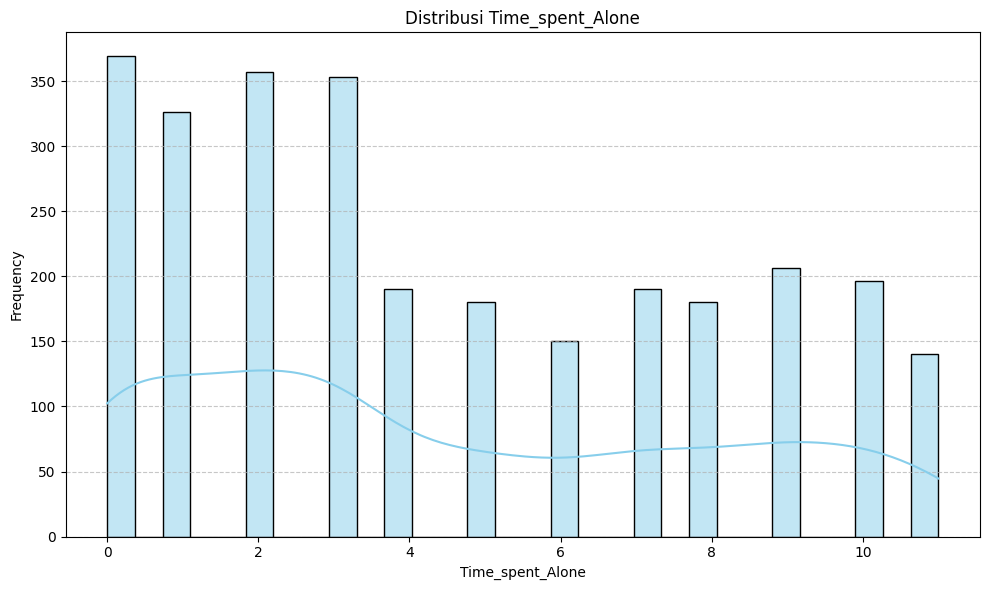

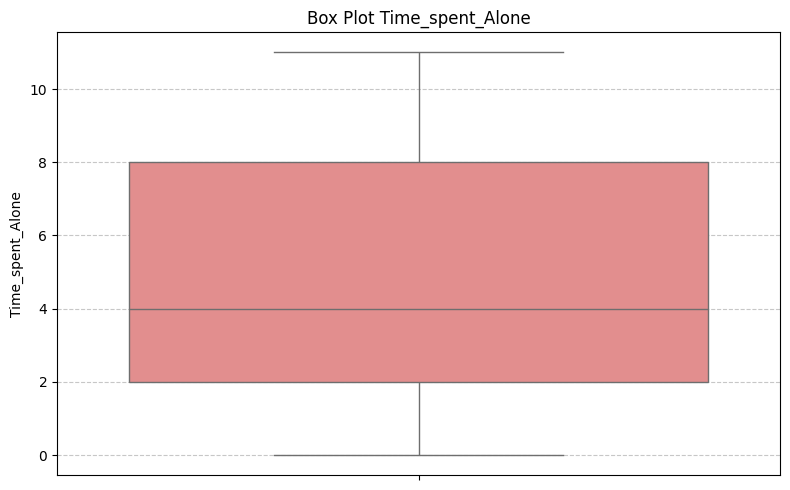


Statistik Deskriptif untuk Kolom 'Time_spent_Alone':
count    2837.000000
mean        4.505816
std         3.479192
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64
------------------------------


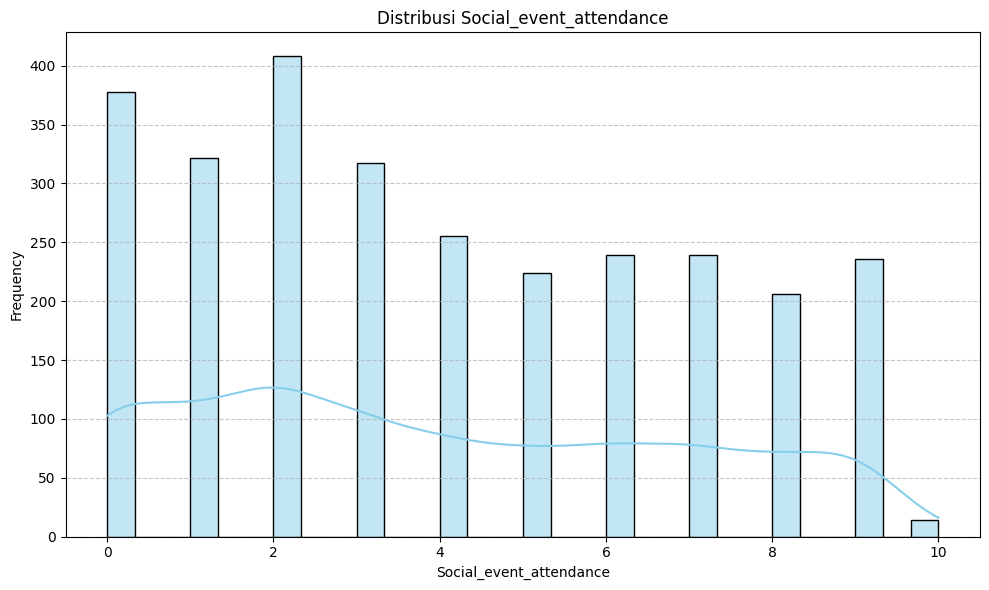

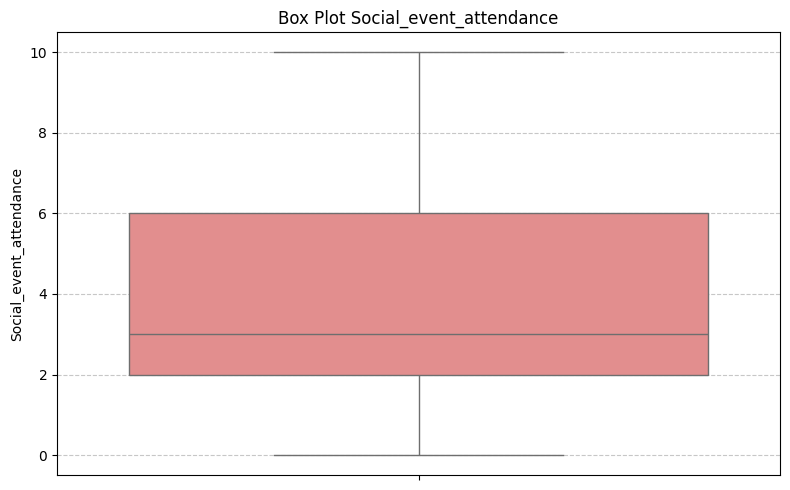


Statistik Deskriptif untuk Kolom 'Social_event_attendance':
count    2838.000000
mean        3.963354
std         2.903827
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: Social_event_attendance, dtype: float64
------------------------------


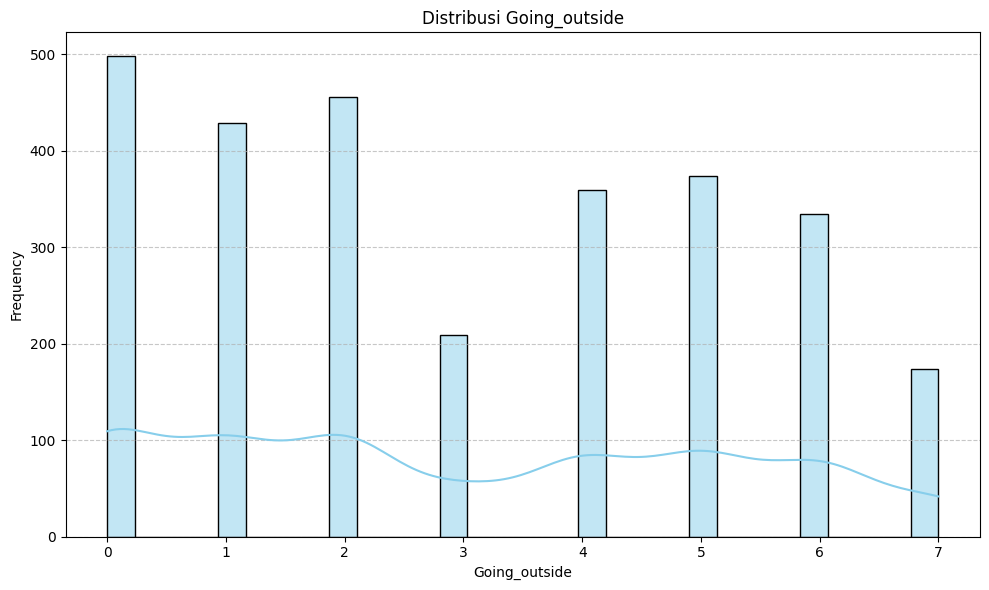

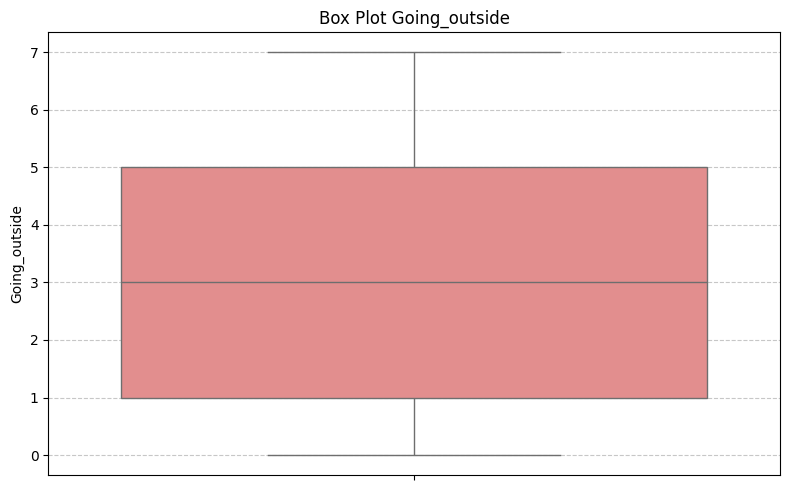


Statistik Deskriptif untuk Kolom 'Going_outside':
count    2834.000000
mean        3.000000
std         2.247327
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Going_outside, dtype: float64
------------------------------


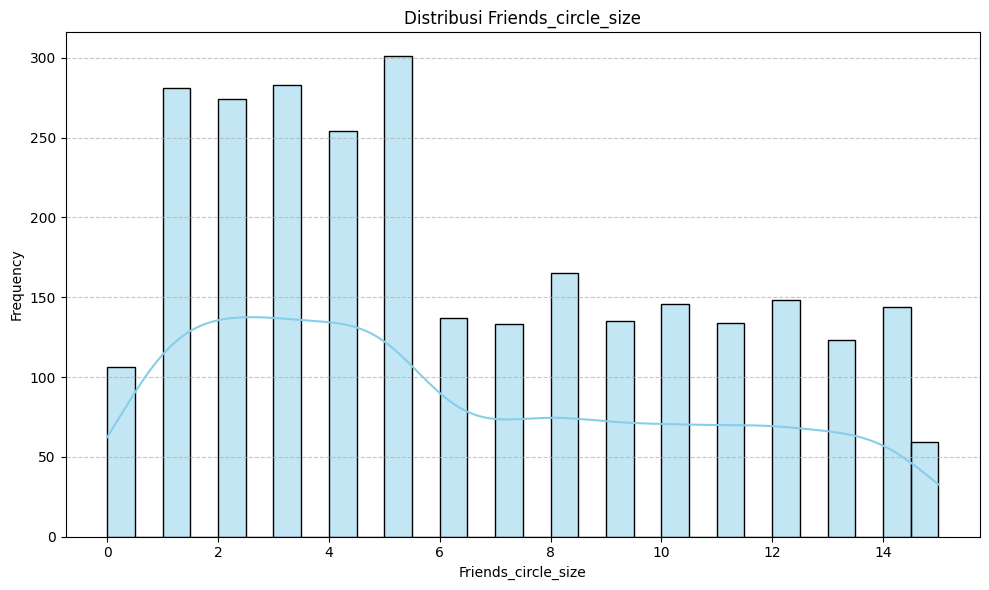

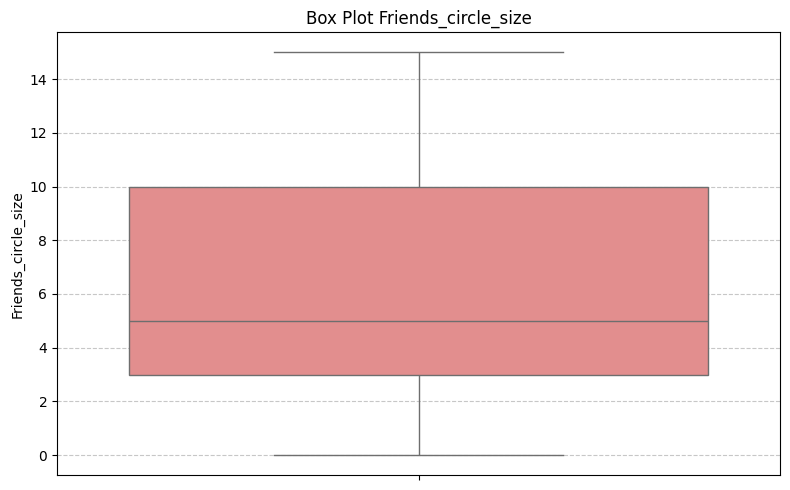


Statistik Deskriptif untuk Kolom 'Friends_circle_size':
count    2823.000000
mean        6.268863
std         4.289693
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        15.000000
Name: Friends_circle_size, dtype: float64
------------------------------


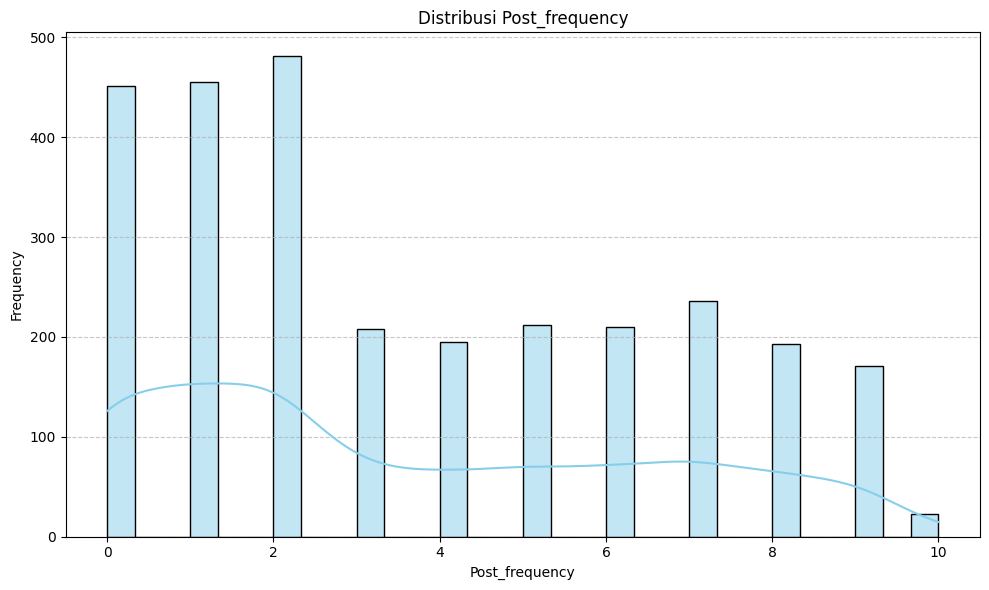

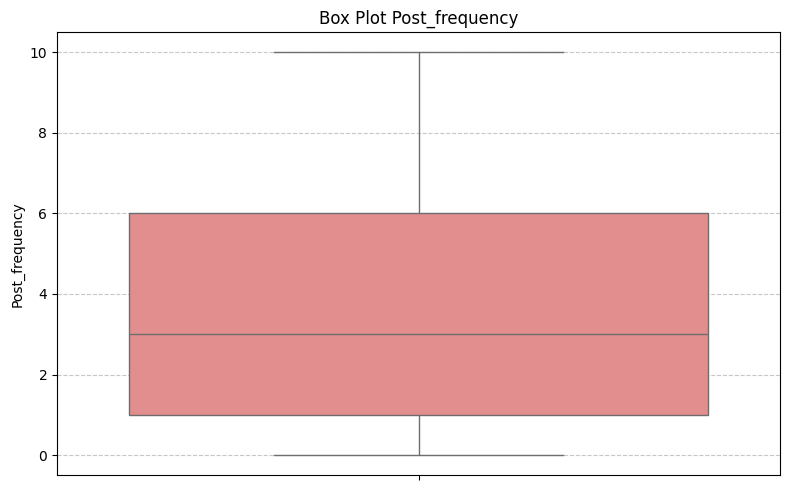


Statistik Deskriptif untuk Kolom 'Post_frequency':
count    2835.000000
mean        3.564727
std         2.926582
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: Post_frequency, dtype: float64
------------------------------
--------------------------------------------------


In [75]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Box Plot {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\nStatistik Deskriptif untuk Kolom '{col}':")
    print(df[col].describe())
    print("-" * 30)

print("-" * 50)

## Bivariate

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\4013551687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='pastel')


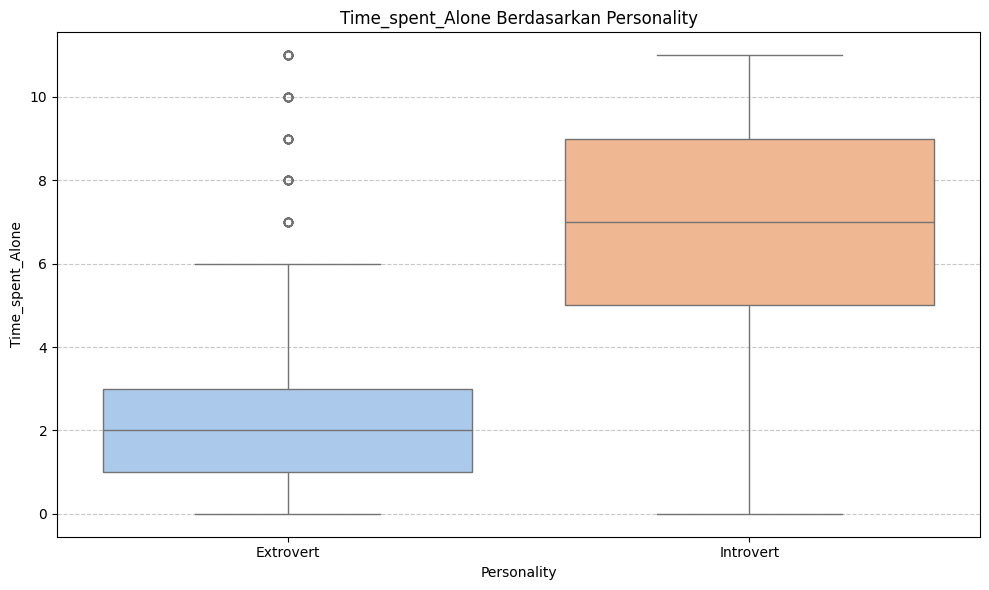

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\4013551687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='pastel')


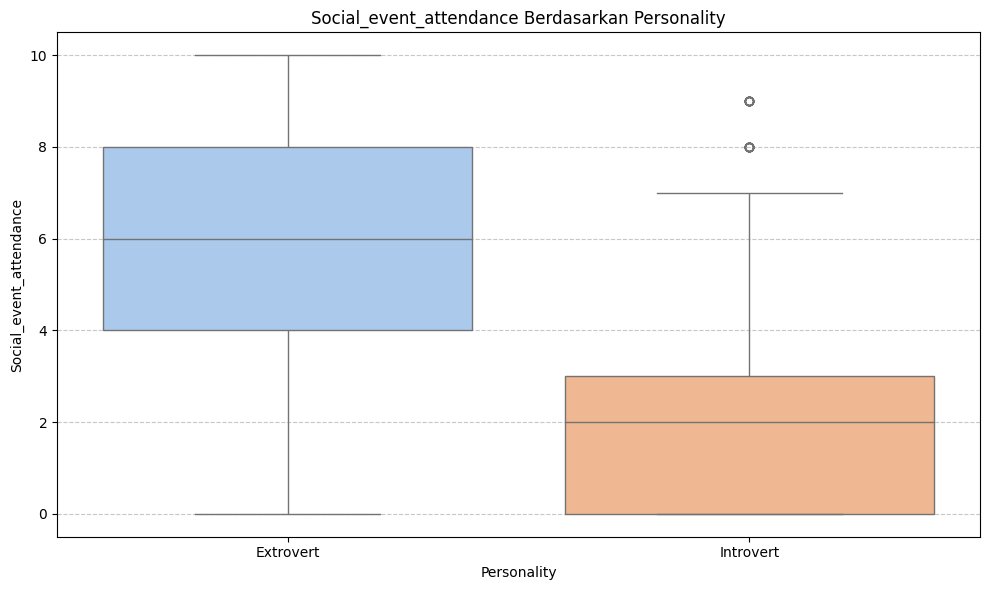

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\4013551687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='pastel')


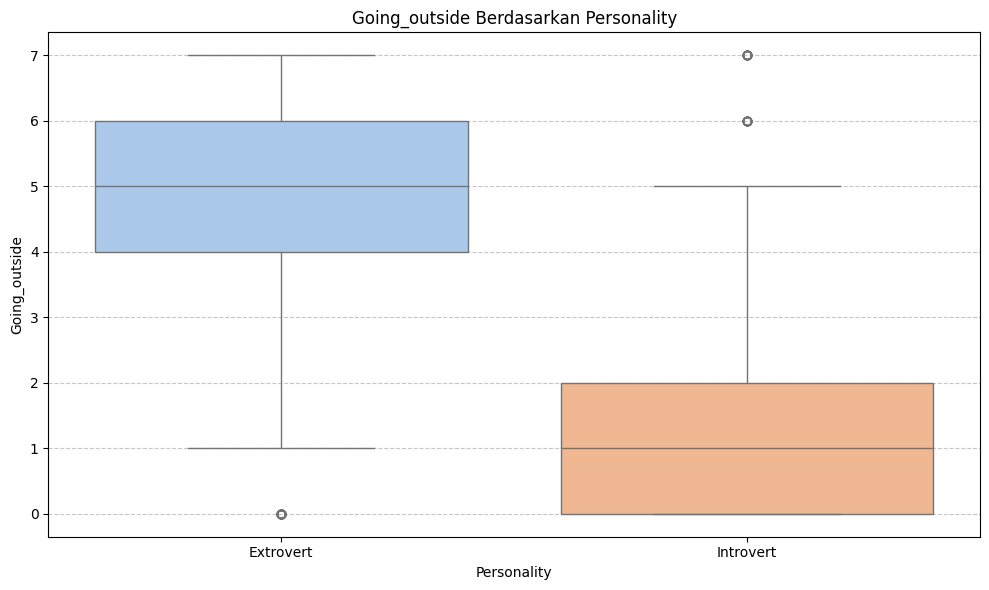

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\4013551687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='pastel')


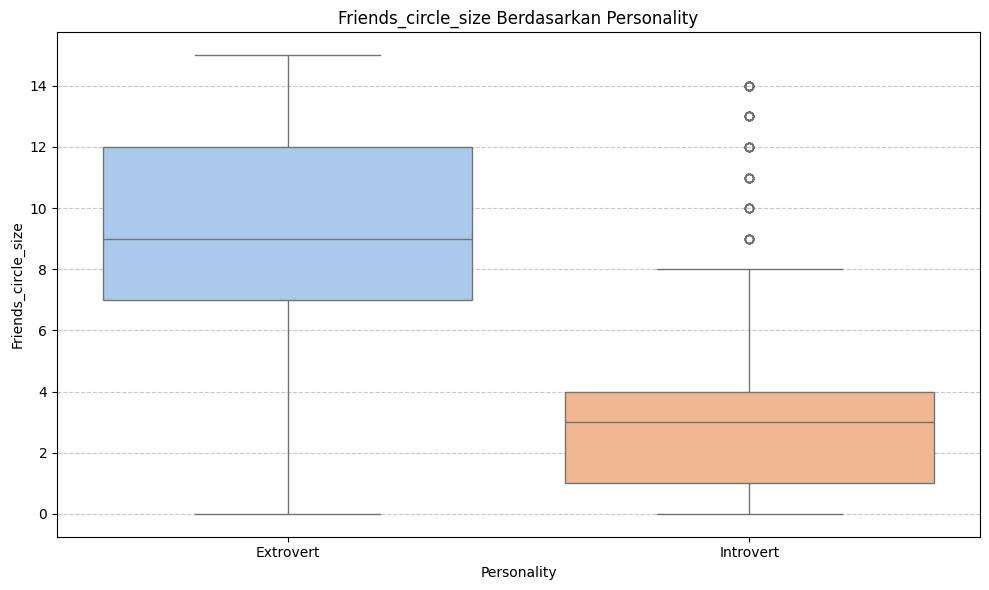

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20224\4013551687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='pastel')


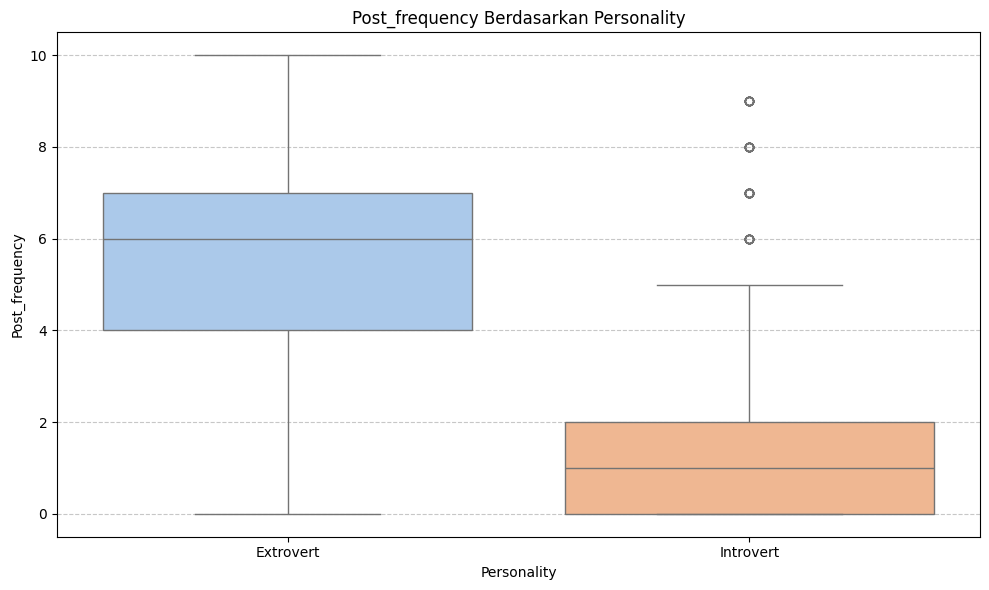

In [76]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Personality', y=col, palette='pastel')
    plt.title(f'{col} Berdasarkan Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

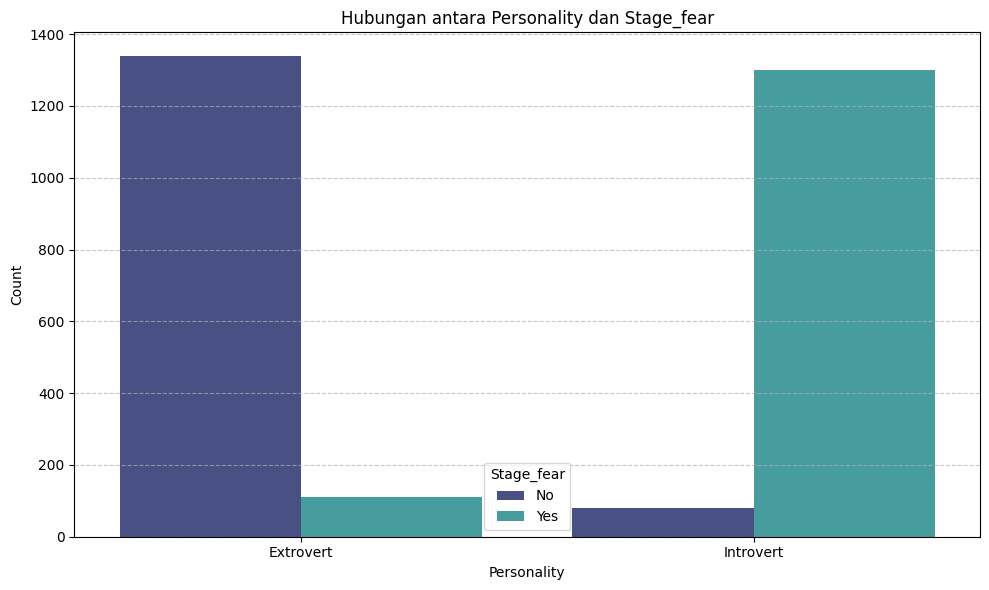

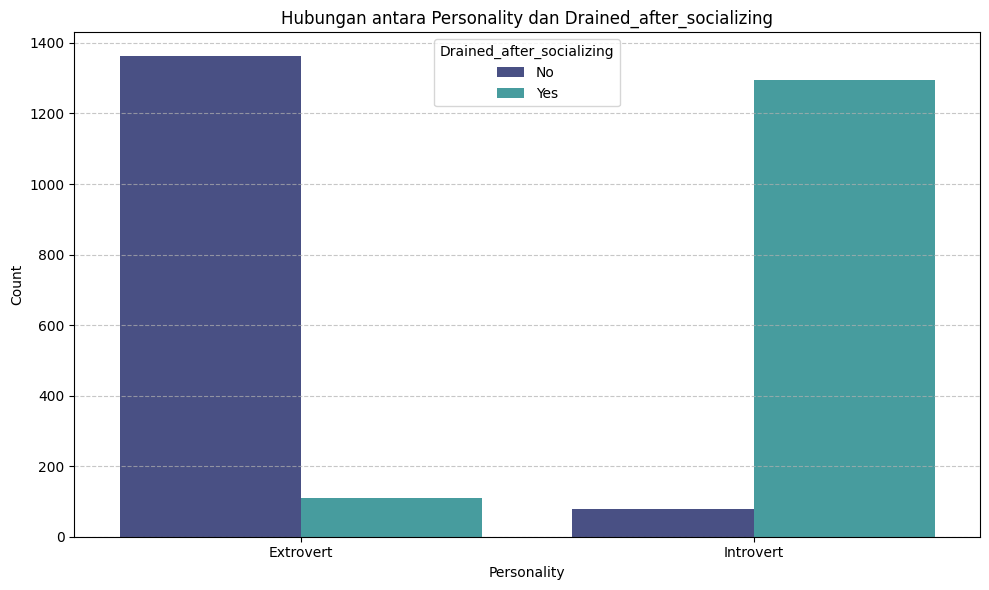

In [77]:
for col in ['Stage_fear', 'Drained_after_socializing']:
    if col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Personality', hue=col, palette='mako')
        plt.title(f'Hubungan antara Personality dan {col}')
        plt.xlabel('Personality')
        plt.ylabel('Count')
        plt.legend(title=col)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## Multivariate

### Correlation

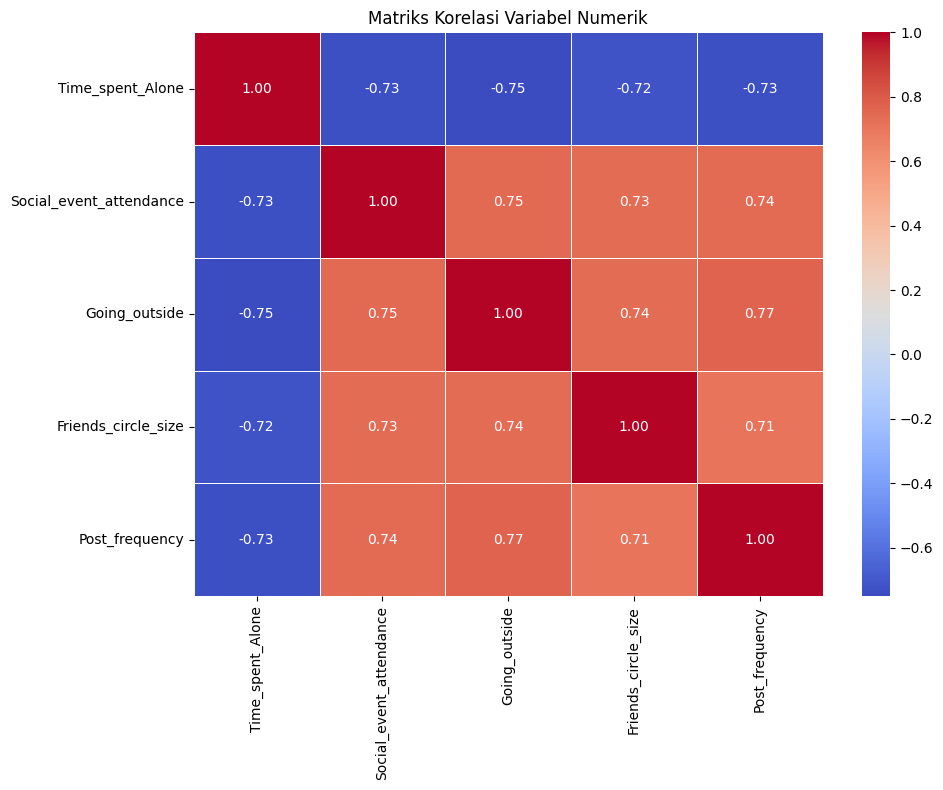


Matriks Korelasi:
                         Time_spent_Alone  Social_event_attendance  \
Time_spent_Alone                 1.000000                -0.733011   
Social_event_attendance         -0.733011                 1.000000   
Going_outside                   -0.750760                 0.747756   
Friends_circle_size             -0.717185                 0.734795   
Post_frequency                  -0.732649                 0.744615   

                         Going_outside  Friends_circle_size  Post_frequency  
Time_spent_Alone             -0.750760            -0.717185       -0.732649  
Social_event_attendance       0.747756             0.734795        0.744615  
Going_outside                 1.000000             0.736390        0.770819  
Friends_circle_size           0.736390             1.000000        0.707888  
Post_frequency                0.770819             0.707888        1.000000  
--------------------------------------------------


In [78]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Variabel Numerik')
    plt.tight_layout()
    plt.show()

    print("\nMatriks Korelasi:")
    print(correlation_matrix)
else:
    print("Tidak cukup variabel numerik untuk analisis korelasi.")
print("-" * 50)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [79]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

### Encoding Target

In [80]:
le_personality = LabelEncoder()
df['Personality_encoded'] = le_personality.fit_transform(df['Personality'])
print(f"Mapping 'Personality': {list(le_personality.classes_)} -> {list(range(len(le_personality.classes_)))}")

Mapping 'Personality': ['Extrovert', 'Introvert'] -> [0, 1]


### Data Splitting

In [81]:
X = df.drop(['Personality', 'Personality_encoded'], axis=1)
y = df['Personality_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nUkuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Distribusi kelas y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribusi kelas y_test:\n{y_test.value_counts(normalize=True)}")


Ukuran X_train: (2320, 7)
Ukuran X_test: (580, 7)
Distribusi kelas y_train:
Personality_encoded
0    0.514224
1    0.485776
Name: proportion, dtype: float64
Distribusi kelas y_test:
Personality_encoded
0    0.513793
1    0.486207
Name: proportion, dtype: float64


### Preprocessing Pipeline

#### Define Pipeline

In [82]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()),                 
    ('pca', PCA(n_components=0.95))               
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

pipeline_preprocessing = Pipeline(steps=[('preprocessor', preprocessor)])
print("\nPipeline Preprocessing telah dibuat.")


Pipeline Preprocessing telah dibuat.


#### Train Pipeline

In [83]:
pipeline_preprocessing.fit(X_train)
print("Pipeline preprocessing selesai dilatih.")

X_train_processed = pipeline_preprocessing.transform(X_train)
X_test_processed = pipeline_preprocessing.transform(X_test)

print(f"\nUkuran X_train setelah preprocessing: {X_train_processed.shape}")
print(f"Ukuran X_test setelah preprocessing: {X_test_processed.shape}")

X_train_processed

Pipeline preprocessing selesai dilatih.



Ukuran X_train setelah preprocessing: (2320, 6)
Ukuran X_test setelah preprocessing: (580, 6)


array([[ 2.01016908, -1.33210162, -0.36071415,  0.43949023,  0.        ,
         0.        ],
       [ 1.62386993, -0.75535196,  0.39131407,  0.27890533,  0.        ,
         0.        ],
       [ 2.6803277 , -0.31912851, -0.14185716, -0.51227928,  0.        ,
         0.        ],
       ...,
       [-2.3446893 , -0.0146285 , -0.2527465 ,  0.56631364,  1.        ,
         1.        ],
       [-2.32116979,  0.62632558,  0.57110169, -0.2871582 ,  1.        ,
         1.        ],
       [-1.23698732, -0.10819408,  0.59121524,  0.4380567 ,  1.        ,
         1.        ]], shape=(2320, 6))

#### Export Pipeline

In [90]:
# Menyimpan X_train_processed
X_train_processed_df = pd.DataFrame(X_train_processed)
train_processed_filename_csv = 'X_train_personality_processing.csv'

X_train_processed_df.to_csv(train_processed_filename_csv, index=False)
print(f"Data X_train_personality_processing telah disimpan sebagai '{train_processed_filename_csv}'")


# Menyimpan X_test_processed
X_test_processed_df = pd.DataFrame(X_test_processed)
test_processed_filename_csv = 'X_test_personality_processing.csv'

X_test_processed_df.to_csv(test_processed_filename_csv, index=False)
print(f"Data X_test_personality_processing telah disimpan sebagai '{test_processed_filename_csv}'")


# Menyimpan y_train dan y_test juga penting!
y_train_filename_csv = 'y_train.csv'
y_test_filename_csv = 'y_test.csv'

y_train.to_csv(y_train_filename_csv, index=False, header=True)
print(f"Data y_train telah disimpan sebagai '{y_train_filename_csv}'")
y_test.to_csv(y_test_filename_csv, index=False, header=True)
print(f"Data y_test telah disimpan sebagai '{y_test_filename_csv}'")

Data X_train_personality_processing telah disimpan sebagai 'X_train_personality_processing.csv'
Data X_test_personality_processing telah disimpan sebagai 'X_test_personality_processing.csv'
Data y_train telah disimpan sebagai 'y_train.csv'
Data y_test telah disimpan sebagai 'y_test.csv'


In [91]:
pipeline_filename = 'preprocessor.joblib'

dump(pipeline_preprocessing, pipeline_filename)

print(f"\nPipeline preprocessing telah disimpan sebagai '{pipeline_filename}'")


Pipeline preprocessing telah disimpan sebagai 'preprocessor.joblib'


In [ ]:
# preprocessor_fitted = pipeline_preprocessing.named_steps['preprocessor']
# num_features_after_pca = [f'pca_comp_{i+1}' for i in range(preprocessor_fitted.named_transformers_['num'].named_steps['pca'].n_components_)]
# cat_features_after_onehot = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
# all_processed_feature_names = list(num_features_after_pca) + list(cat_features_after_onehot)

# X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_processed_feature_names, index=X_train.index)

# print("\n--- X_train_processed sebagai DataFrame ---")
# print(X_train_processed_df.head())
# print("\nInformasi DataFrame X_train_processed_df:")
# X_train_processed_df.info()